# Abalone

My analysis of the abalone dataset.

### Overview

This dataset includes various physical measurements related to abalone, a type of sea snail. The objective of this data analysis is to illustrate the correlation between these easier-to-measure physical attributes and the age of abalone, as previous measures rendered far too time consuming.

The data set is divided into two measurements, length (in mm) and weight (in grams), length is divided into the length of the shell, the diameter and the height. While weight considers the whole weight of the abalone, the weight of the meat, the gut weight and the shell weight. Each abalone are divided into three categories: male, female and infant. And finally the traditional more time consuming marker of abalone age; ring number, have also been included. 

In [125]:
# Data frames.
import pandas as pd

In [126]:
# Load the abalone data set from csv file.
abalone = pd.read_csv("abalone.csv")

In [127]:
# To display for the first 5 and last 5 samples in the dataset
abalone

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


### Python Types

#### Number Columns
Length, diameter, height, whole weight, shucked weight, viscera weight and shell weight are all expressed using decimals and so the appropriate data type for these columns is __float__. This allows python to interpret the precise decimals in our measurements.

#### Discrete Number Columns
The number of rings an abalone has is expressed using whole numbers or integers, where decimals are not present. In this case **int** is appropriate.

#### Category Columns
The sex of the abalone is categorised in three ways: Male, Female and Infant or M, F and I. As these are not expressed with numbers, they will be stored as categorical data using **category**.

In [128]:
# using pandas to describe the data set i.e. show number of samples, mean, stabdard deviation, min and max
description = abalone.describe()

In [129]:
# to print the descriptive statistics
description

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [130]:
# imports matplotlib so that we can create plots.
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

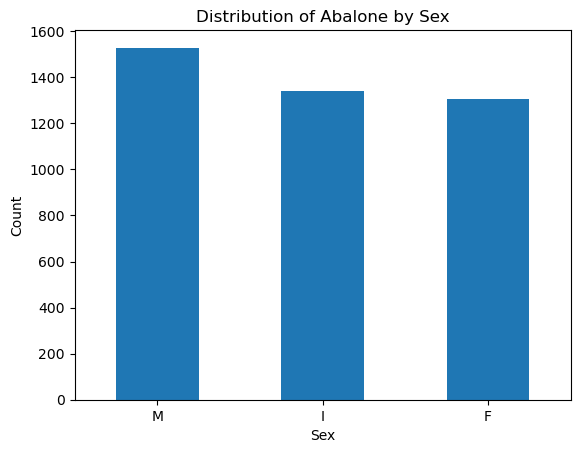

In [131]:
# creates a bar chart to show the distribution of "sex"
abalone["sex"].value_counts().plot(kind="bar")
plt.title("Distribution of Abalone by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.xticks(rotation=0) # ensures labels are upright
plt.show

In [132]:
# dividing the data set into the different sexes, may be useful later.
male = abalone[abalone["sex"]== "M"]
female = abalone[abalone["sex"]== "F"]
infant = abalone[abalone["sex"]== "I"]

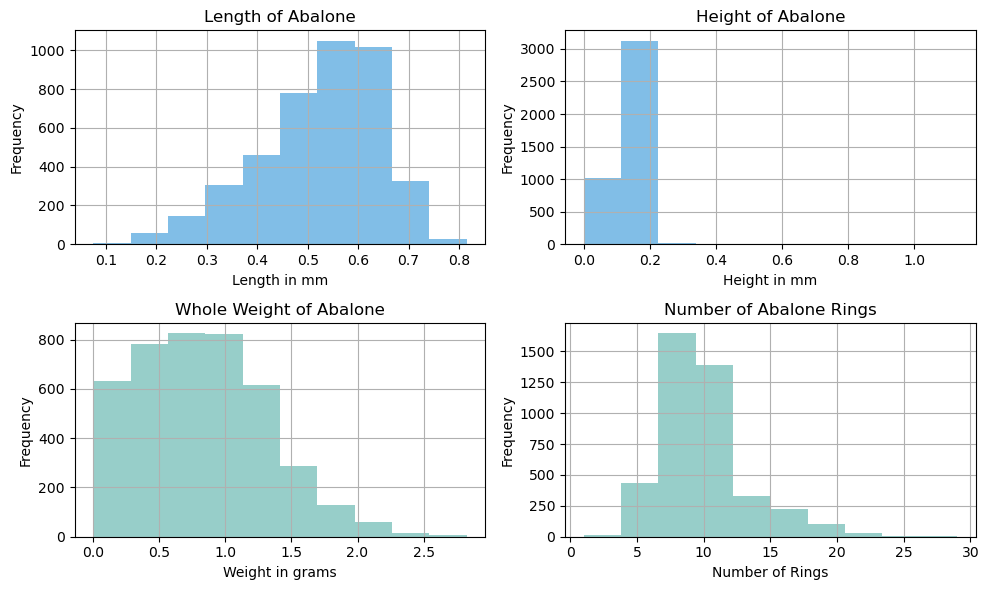

In [133]:
# Creating a subplot of histograms for an overview of 4 variables:
variable_overview, axes= plt.subplots(nrows=2, ncols=2, figsize=(10, 6)) # Creates a four histogram plot, number of rows and columns specified and the size of the figure in inches
abalone["length"].hist(ax=axes[0,0], color="#4ca3dd", alpha=0.7)  # isolates length column and assigns it to row 1, column 1, alpha refers to the opacity
axes[0,0].set_xlabel("Length in mm") # labels the x axis, along the bottom
axes[0,0].set_ylabel("Frequency") # labels the y axis, up the side
axes[0,0].set_title("Length of Abalone") # gives a title to this individual histogram

abalone["height"].hist(ax=axes[0,1], color="#4ca3dd", alpha=0.7)
axes[0,1].set_xlabel("Height in mm")
axes[0,1].set_ylabel("Frequency")
axes[0,1].set_title("Height of Abalone")

abalone["whole_weight"].hist(ax=axes[1,0], color="#6bbab3", alpha=0.7) # hexadecimal colour to match abalone colour scheme
axes[1,0].set_xlabel("Weight in grams")
axes[1,0].set_ylabel("Frequency")
axes[1,0].set_title("Whole Weight of Abalone")

abalone["rings"].hist(ax=axes[1,1], color="#6bbab3", alpha=0.7)
axes[1,1].set_xlabel("Number of Rings")
axes[1,1].set_ylabel("Frequency")
axes[1,1].set_title("Number of Abalone Rings")
plt.tight_layout()  # prevents overlapping of subplots
plt.show()